<a href="https://colab.research.google.com/github/ajrotert/Machine-Learning/blob/master/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Preprocessing Data

In [0]:
import smtplib

def sendmail(msg = 'COLAB work is finished!'):
  server = smtplib.SMTP('smtp.gmail.com', 587)
  server.starttls()
  server.login('andrew.rotert@gmail.com', '-')
  server.sendmail('andrew.rotert@gmail.com', 'andrew.rotert@gmail.com', msg)
  server.quit  
  return;



    Emails a message, called by cells with long runtimes to notify users when a cell is completed

In [0]:
import os, shutil
original_dataset_dir = '/content/drive/My Drive/Data/CatsVsDogs/train'
base_dir = '/content/drive/My Drive/Data/CatsVsDogs_Small'

    Directories within google drive

In [0]:
#Creating directories, only needs to be run once

#train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)

#validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)

#test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

#train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)

#train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)

#validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir)

#validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)

#test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)

#test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)

    Programmatically create sub directories 

In [0]:
list_of_names = ['cat.{}.jpg'.format(i) for i in range(1000)]

for name in list_of_names:
  src = os.path.join(original_dataset_dir, name)
  dst = os.path.join(train_cats_dir, name)
  shutil.copyfile(src, dst)

list_of_names = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for name in list_of_names:
  src = os.path.join(original_dataset_dir, name)
  dst = os.path.join(validation_cats_dir, name)
  shutil.copyfile(src, dst)
 
list_of_names = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for name in list_of_names:
  src = os.path.join(original_dataset_dir, name)
  dst = os.path.join(test_cats_dir, name)
  shutil.copyfile(src, dst)


list_of_names = ['dog.{}.jpg'.format(i) for i in range(1000)]

for name in list_of_names:
  src = os.path.join(original_dataset_dir, name)
  dst = os.path.join(train_dogs_dir, name)
  shutil.copyfile(src, dst)

list_of_names = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for name in list_of_names:
  src = os.path.join(original_dataset_dir, name)
  dst = os.path.join(validation_dogs_dir, name)
  shutil.copyfile(src, dst)
 
list_of_names = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for name in list_of_names:
  src = os.path.join(original_dataset_dir, name)
  dst = os.path.join(test_dogs_dir, name)
  shutil.copyfile(src, dst)

sendmail("Files transfer done")

    Copy a small subset of images in to new directories 

##Image Classification using CNN's

In [13]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [15]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

    Creating a model

In [0]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

    Creating a compiler

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')

validation_gen = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


    Creating data generators to select random images for the model

In [20]:
history = model.fit_generator(train_gen, steps_per_epoch=100, epochs=30, validation_data=validation_gen, validation_steps=50)
model.save('CatsVsDogs_Small_1.h5')
sendmail('Model Done Training')

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/30
100/100 [==============================] - 19s 188ms/step - loss: 0.6823 - acc: 0.5505 - val_loss: 0.6677 - val_acc: 0.5710
Epoch 2/30
100/100 [==============================] - 12s 121ms/step - loss: 0.6269 - acc: 0.6505 - val_loss: 0.6400 - val_acc: 0.6190
Epoch 3/30
100/100 [==============================] - 12s 121ms/step - loss: 0.5792 - acc: 0.6980 - val_loss: 0.6010 - val_acc: 0.6740
Epoch 4/30
100/100 [==============================] - 12s 118ms/step - loss: 0.5499 - acc: 0.7245 - val_loss: 0.6124 - val_acc: 0.6360
Epoch 5/30
100/100 [==============================] - 12s 119ms/step - loss: 0.5263 - acc: 0.7355 - val_loss: 0.5815 - val_acc: 0.6970
Epoch 6/30
100/100 [==============================] - 12s 120ms/step - loss: 0.4941 - acc: 0.7635 - val_loss: 0.5635 - val_acc: 0.7070
Epoch 7/30
100/100 [=

    Training the model

<Figure size 432x288 with 0 Axes>

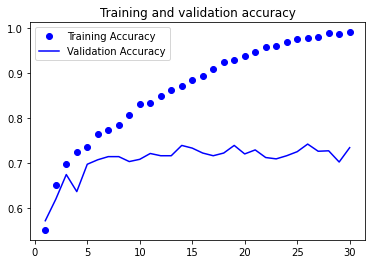

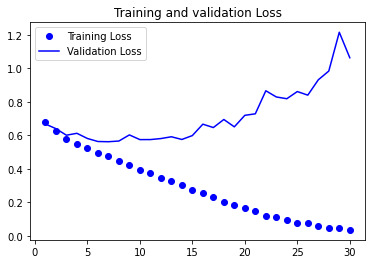

<Figure size 432x288 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

    Visualizing the results, it appears that are model is overfitting to the data

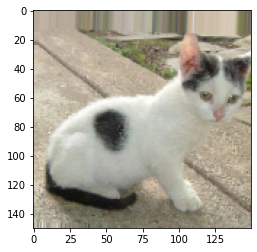

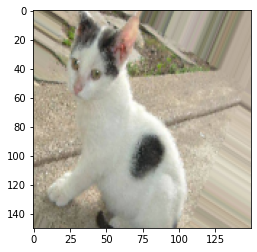

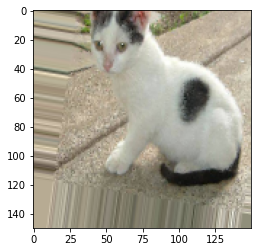

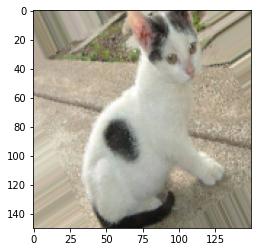

In [26]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

from keras_preprocessing import image
list_of_names = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

image_path = list_of_names[3]
img = image.load_img(image_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size =1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if(i%4 == 0):
    break

plt.show()

    Modifing data generators to help the model generalize data better

In [27]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

    Creating a new model with a dropout layer to limit overfitting

In [0]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

    Recompile 

In [29]:
train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')

validation_gen = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


    Reset data generators

In [30]:
history = model.fit_generator(train_gen, steps_per_epoch=100, epochs=100, validation_data=validation_gen, validation_steps=50)
model.save('CatsVsDogs_Small_2.h5')
sendmail('Model 2 Done Training')

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/100
100/100 [==============================] - 22s 216ms/step - loss: 0.6960 - acc: 0.4955 - val_loss: 0.6884 - val_acc: 0.5020
Epoch 2/100
100/100 [==============================] - 21s 209ms/step - loss: 0.6893 - acc: 0.5330 - val_loss: 0.6792 - val_acc: 0.5300
Epoch 3/100
100/100 [==============================] - 20s 204ms/step - loss: 0.6782 - acc: 0.5705 - val_loss: 0.6898 - val_acc: 0.5260
Epoch 4/100
100/100 [==============================] - 20s 204ms/step - loss: 0.6663 - acc: 0.5885 - val_loss: 0.6753 - val_acc: 0.5630
Epoch 5/100
100/100 [==============================] - 21s 206ms/step - loss: 0.6499 - acc: 0.6255 - val_loss: 0.6746 - val_acc: 0.5730
Epoch 6/100
100/100 [==============================] - 20s 204ms/step - loss: 0.6366 - acc: 0.6425 - val_loss: 0.6206 - val_acc: 0.6410
Epoch 7/100
100/100 [==============================] - 21s 206ms/step - loss: 0.6277 - acc:

    Training new model

<Figure size 432x288 with 0 Axes>

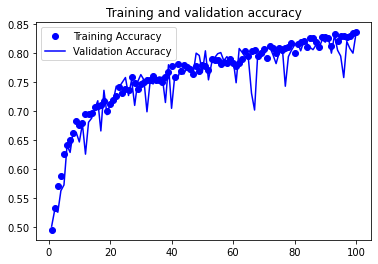

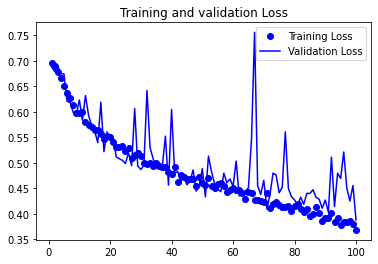

<Figure size 432x288 with 0 Axes>

In [31]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

    Visualizing the new results, appears to be a better model